<a href="https://colab.research.google.com/github/SrinivasMandla/Cognifyz-technologies-Data-Science/blob/main/Customer_Preference_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEVEL 3

**TASK 2**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [3]:
df=pd.read_csv('/content/Dataset .csv')

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [7]:
df['Cuisines'].fillna('NA',inplace=True)

In [8]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [32]:
Cuisines=df['Cuisines']

In [33]:
Cuisines.value_counts().head(10)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


In [35]:
top_10_cuisines=Cuisines.value_counts().head(10).index

In [40]:
cusine_ratings = pd.DataFrame({'Cuisine':Cuisines,'Rating': df['Aggregate rating']})

In [41]:
cusine_ratings_top10 = cusine_ratings[cusine_ratings['Cuisine'].isin(top_10_cuisines)]

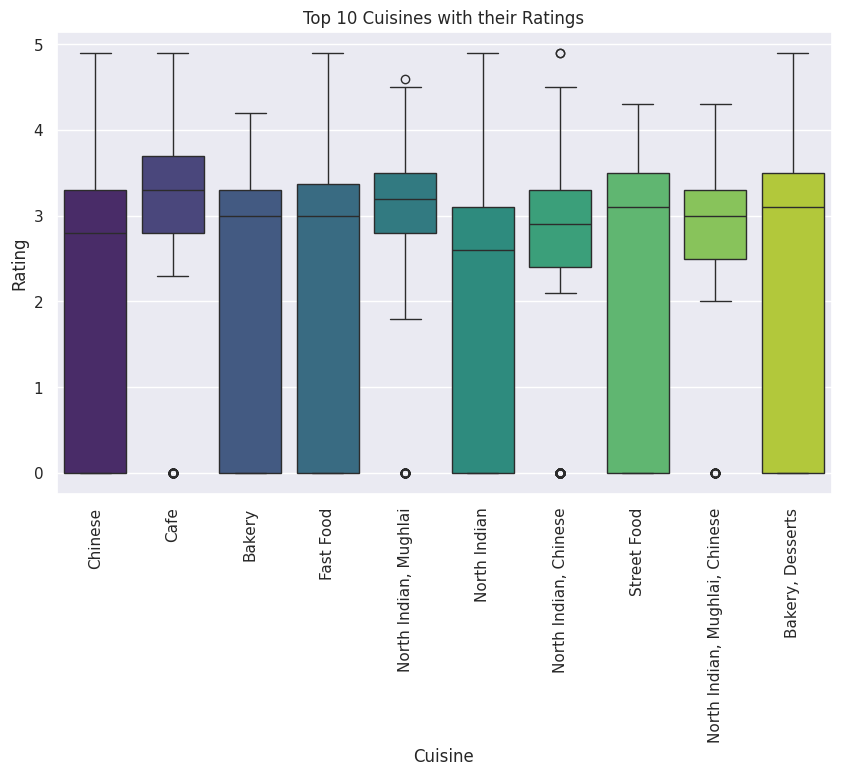

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisine',y='Rating',data=cusine_ratings_top10,palette='viridis')
plt.title('Top 10 Cuisines with their Ratings')
plt.xticks(rotation=90)
plt.show()

*identify the most popular cusines among customers based on the number of votes*

In [47]:
cusines_votes = pd.DataFrame({'Cuisine':Cuisines,'Votes': df['Votes']})

In [49]:
cusines_votes_sum =cusines_votes.groupby('Cuisine').sum()

In [50]:
popular_cuisines = cusines_votes_sum.sort_values(by='Votes',ascending=False).head(10)

In [51]:
print('Top 10 most popular cuisines are:')
print(popular_cuisines)

Top 10 most popular cuisines are:
                                Votes
Cuisine                              
North Indian, Mughlai           53747
North Indian                    46241
North Indian, Chinese           42012
Cafe                            30657
Chinese                         21925
North Indian, Mughlai, Chinese  20115
Fast Food                       17852
South Indian                    16433
Mughlai, North Indian           15275
Italian                         14799


<Figure size 1000x600 with 0 Axes>

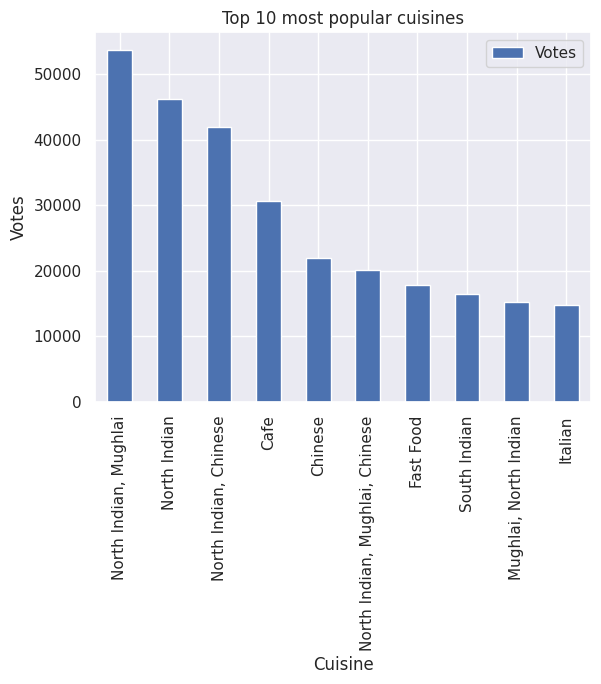

In [52]:
plt.figure(figsize=(10,6))
popular_cuisines.head(10).plot(kind='bar')
plt.title('Top 10 most popular cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Votes')
plt.show()

*determine if there are any specific cusines that trend to receive higher ratings*

In [53]:
cusine_ratings=pd.DataFrame({'Cuisine':Cuisines,'Rating':df['Aggregate rating']})


In [55]:
average_rating_by_rating =cusine_ratings.groupby('Cuisine').mean()

In [56]:
sorted_cuisines_by_rating = average_rating_by_rating.sort_values(by='Rating',ascending=False)

In [58]:
print('Top 10 most popular cuisines are:')
print(sorted_cuisines_by_rating.head)

Top 10 most popular cuisines are:
<bound method NDFrame.head of                                       Rating
Cuisine                                     
American, Sandwich, Tea                  4.9
American, Burger, Grill                  4.9
European, Contemporary                   4.9
American, Coffee and Tea                 4.9
European, German                         4.9
...                                      ...
Nepalese, Tibetan                        0.0
North Indian, Fast Food, Mithai          0.0
Seafood, Mughlai, North Indian           0.0
North Eastern, North Indian, Chinese     0.0
Cafe, Tibetan                            0.0

[1826 rows x 1 columns]>


<Figure size 1200x600 with 0 Axes>

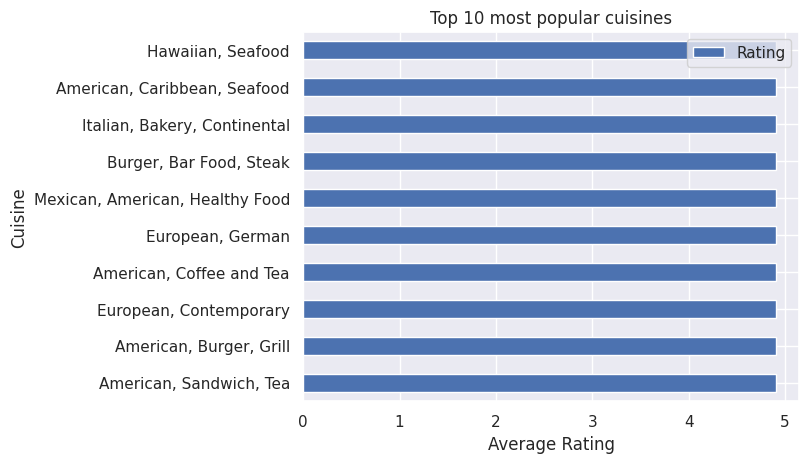

In [64]:
plt.figure(figsize=(12,6))
sorted_cuisines_by_rating.head(10).plot(kind='barh')
plt.title('Top 10 most popular cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()